In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn
#seaborn.set(style="whitegrid")

In [2]:
plt.close('all')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
LEGEND_FONT_SIZE = 8
AXIS_FONT_SIZE = 10
TICKS_FONT_SIZE=7
linewidth=2.0

In [3]:
def getstats(res):
    return {
        'selectedCorrect': res.selectCorrect,
        'selectedPercentageCorrect': len(res.selectCorrect) / res.numUsefulFeatures,
        'selectedPercentage': len(res.selectCorrect) / 15,
        'selectedWrong': res.numSelectedWrong,
        'svmAccuracy': res.svmHihgCAccuracy,
        'lmAccuracy': res.lmAccuracy,
        'value': res.value,
        'criterion': res.criterion}

In [4]:
with open('meta_results.pickle', 'rb') as fp:
    results = pickle.load(fp)

In [5]:
def getResultsDf(results):
    out = []
    for dataset in results:
        for ress in dataset.values():
            for res in ress:
                out.append(getstats(res))
                
    return  pd.DataFrame(out)

In [6]:
binariesDf = getResultsDf(results['binary'])
regressionDf = getResultsDf(results['regression'])

In [14]:
import numpy as np
def plotAccuracyAndSelected(df):
    subdf = df[df.criterion == 'error']
    avgSvmAcc = []
    sdSvmAcc = []
    avgSelected = []
    sdSelected = []
    errValues = sorted(list(set(subdf['value'])))
    fig = plt.figure(figsize=(10, 5.5))
    for val in errValues:
        accuracies = subdf[subdf['value'] == val]['svmAccuracy'].tolist()
        selected = subdf[subdf['value'] == val]['selectedPercentage'].tolist()
        avgSvmAcc.append(np.mean(accuracies))
        sdSvmAcc.append(np.std(accuracies))
        avgSelected.append(np.mean(selected))
        sdSelected.append(np.std(selected))
    
    avgSvmAcc = np.array(avgSvmAcc)
    sdSvmAcc = np.array(sdSvmAcc)
    avgSelected = np.array(avgSelected)
    sdSelected = np.array(sdSelected)
    
        
    plt.tick_params(axis='y', colors='k', labelsize=TICKS_FONT_SIZE*2.5)
    plt.tick_params(axis='x', colors='k', labelsize=TICKS_FONT_SIZE*2.5)

    #plt.errorbar(errValues, avgSvmAcc, yerr=sdSvmAcc, fmt='-o', label="Accuracy", linewidth=linewidth)
    #plt.errorbar(errValues, avgSelected, yerr=sdSelected, fmt='-o', label="Features", linewidth=linewidth)
    plt.fill_between(errValues, avgSvmAcc-sdSvmAcc, avgSvmAcc+sdSvmAcc, alpha=0.3)
    plt.fill_between(errValues, avgSelected-sdSelected, avgSelected+sdSelected, alpha=0.3)
    plt.plot(errValues, avgSvmAcc,  label="Accuracy", marker='o', linewidth=linewidth, markersize=10)
    plt.plot(errValues, avgSelected,  label="Selected features", marker='d', linewidth=linewidth, markersize=10)
    
    plt.xlabel("error threshold ($\delta$)", fontsize=AXIS_FONT_SIZE*2.5)
    plt.legend(fontsize=LEGEND_FONT_SIZE*2.5)
    plt.grid()
    plt.savefig('accuracy_and_selected.pdf', format='pdf', dpi=1000)
    plt.show()

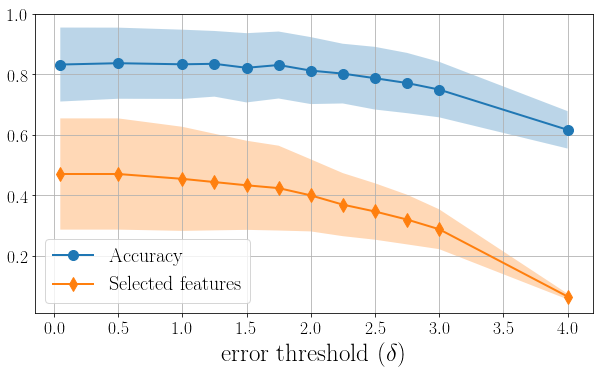

In [15]:
plotAccuracyAndSelected(binariesDf)

# Binary Big

In [16]:
def getBinaryBigDataset(data):
    out = []
    for index, numSamples in enumerate(range(50, 401, 50)):
        for res in data[index]:
            out.append({
                'svm_accuracy_c1': res.svmC1Accuracy,
                'svm_accuracy_c0_1': res.svmLowCAccuracy,
                'svm_accuracy_c10': res.svmHihgCAccuracy,
                 'threshold': res.value,
                 'num_samples': numSamples,
                 'num_neighbors': res.numNeighbors,
                 'num_neighbors_den': res.numSamples // res.numNeighbors})
    return pd.DataFrame(out)

In [17]:
with open("binary_big_res.pickle", 'rb') as fp:
    data = pickle.load(fp)
    
df = getBinaryBigDataset(data)
df.head()

,num_neighbors,num_neighbors_den,num_samples,svm_accuracy_c0_1,svm_accuracy_c1,svm_accuracy_c10,threshold
0,5,10,50,0.432,0.512,0.528,0.05
1,5,10,50,0.432,0.512,0.528,0.10
2,2,25,50,0.432,0.520,0.560,0.05
3,2,25,50,0.432,0.520,0.560,0.10
4,1,50,50,0.432,0.432,0.424,0.05


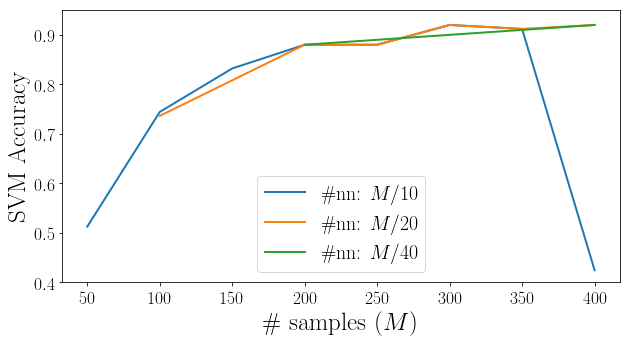

In [30]:
fig = plt.figure(figsize=(10, 5))
error = 0.05
errDf = df[df.threshold == error]
for den in [10, 20, 40]:
    subdf = errDf[errDf['num_neighbors_den'] == den]
    plt.plot(
        subdf['num_samples'], subdf['svm_accuracy_c1'],
        label="\#nn: $M/{0}$".format(den), linewidth=linewidth)

plt.ylim(0.4, 0.95)
plt.tick_params(axis='y', colors='k', labelsize=TICKS_FONT_SIZE*2.5)
plt.tick_params(axis='x', colors='k', labelsize=TICKS_FONT_SIZE*2.5)
plt.xlabel("\# samples ($M$)", fontsize=AXIS_FONT_SIZE*2.5)
plt.ylabel("SVM Accuracy", fontsize=AXIS_FONT_SIZE*2.5)
plt.legend(fontsize=LEGEND_FONT_SIZE*2.5, loc=8)
plt.savefig("binary_big.pdf", format='pdf', dpi=1000)
plt.show()

# Binaries By Features

In [49]:
data[1][0].__dict__

{'binary': True,
 'criterion': 'error',
 'name': None,
 'numNeighbors': 30,
 'numSamples': 300,
 'numSelected': 1,
 'numUseful': None,
 'selected': array([27]),
 'svmC1Accuracy': 0.528,
 'svmHihgCAccuracy': 0.472,
 'svmLowCAccuracy': 0.46,
 'value': 0.05}

In [50]:
250 // 40

6

In [51]:
def getBinaryByFeatDataset(data):
    out = []
    for df in data:
        for res in df:
            if res.value in [0.05, 5]:
                continue
                
            out.append(
                    {'threshold': res.value,
                     'svm_accuracy': res.svmHihgCAccuracy,
                     'num_neighbors': res.numNeighbors,
                     'num_useful': res.numUseful,
                     'criterion': res.criterion})
    return pd.DataFrame(out)

In [52]:
with open('binaries_by_features_res.pickle', 'rb') as fp:
    binariesByFeat = pickle.load(fp)
    
data = getBinaryByFeatDataset(binariesByFeat)

In [53]:
data = data[data.num_useful.between(9, 25)]

In [54]:
criterionAndTreshold = []
for index, row in data.iterrows():
    if row.criterion == "num_features":
        crit = "#F"
    elif row.criterion == "error":
        crit = "ER"
    elif row.criterion == "feature_score":
        crit = "FS"
    else:
        crit = "\DeltaFS"
    criterionAndTreshold.append("{0}:{1}".format(crit, row.threshold))
    
data['Criterion'] = criterionAndTreshold

In [55]:
current_palette = seaborn.color_palette("hls", 8)
current_palette

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

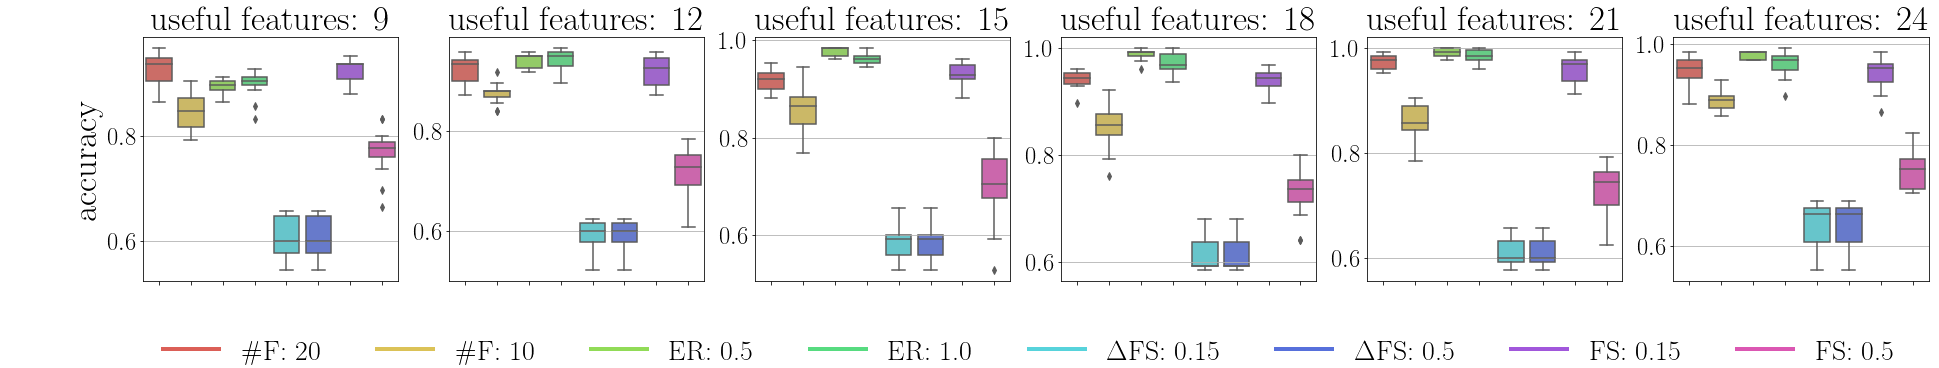

In [102]:
from matplotlib.lines import Line2D

errThresholds = [0.5, 1.0]
scoreThresholds = [0.15, 0.5]
#thresholds = sorted(list(set(errData['threshold'])))
numFeatures = sorted(list(set(data['num_useful'])))

fig = plt.figure(figsize=(32, 5))



for index, nFeat in enumerate(numFeatures):
    ax = fig.add_subplot(1, 6, index+1)
    currDf = data[data["num_useful"] == nFeat]
    seaborn.boxplot(y="svm_accuracy", x="Criterion", data=currDf, palette="hls")
    if index in [0]:#[0, 3]:
        ax.set_ylabel("accuracy", fontsize=AXIS_FONT_SIZE*3.5)
    else:
        ax.set_ylabel("")
    ax.set_xlabel("")
    ax.yaxis.grid()
    #currDf.boxplot(ax=ax, by=['criterion', 'threshold'], column='svm_accuracy', rot=90)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xticklabels("")
    ax.tick_params(axis='y', colors='k', labelsize=TICKS_FONT_SIZE*3.5)
    ax.set_title("useful features: {0}".format(nFeat), fontsize=AXIS_FONT_SIZE*3.5)

plt.subplots_adjust(bottom=0.14)
## Create custom legend
custom_lines = [Line2D([0], [0], color=current_palette[i], lw=4) for i in range(8)]
lgd = fig.legend(custom_lines, 
           ['\#F: 20', '\#F: 10', 'ER: 0.5', 'ER: 1.0', "$\Delta$FS: 0.15", "$\Delta$FS: 0.5",
            "FS: 0.15", "FS: 0.5"], loc=2,
           ncol=8,  fontsize=LEGEND_FONT_SIZE*3.5, bbox_to_anchor=(0.06, 0.15), frameon=False)

#fig.tight_layout(rect=[0, 0, 1, 1])
fig.subplots_adjust(bottom=0.2)
plt.savefig('binaries_by_features_boxplots.pdf', format='pdf', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Old BoxplotsByCriterion

In [92]:
def boxplotsByCriterion(df, linewidth=2):
    boxprops = dict(linestyle='-', linewidth=linewidth, color='k')
    
    fig = plt.figure(figsize=(20, 20))
    criteria = ['error', 'num_features', 'feature_score', 'delta_score']
    for index, crit in enumerate(criteria):
        critDf = df[df.criterion == crit]
        
        ax = fig.add_subplot(5, 4, 4 * index + 1)
        critDf.boxplot(ax=ax, by=['value'], column='lmAccuracy', boxprops=boxprops)
        ax.set_ylim((-0.4,1))
        ax.set_title('LM Accuracy, \nCriterion: {0}'.format(crit))
        
        ax = fig.add_subplot(5, 4, 4 * index + 2)
        critDf.boxplot(ax=ax, by=['value'], column='svmAccuracy', boxprops=boxprops)
        ax.set_ylim((-0.4,1))
        ax.set_title('SVM Accuracy, \nCriterion: {0}'.format(crit))
        
        ax = fig.add_subplot(5, 4, 4 * index + 3)
        critDf.boxplot(ax=ax, by=['value'], column='selectedPercentageCorrect', boxprops=boxprops)
        ax.set_title('Selected Correct (%), \nCriterion: {0}'.format(crit))
        
        ax = fig.add_subplot(5, 4, 4 * index + 4)
        critDf.boxplot(ax=ax, by=['value'], column='selectedWrong', boxprops=boxprops)
        ax.set_title('Selected Wrong, \nCriterion: {0}'.format(crit))
        
        plt.suptitle("")
    plt.tight_layout()
    plt.show()

    
def boxplotsByCriterionOnlyAccuracy(df, linewidth=2):
    boxprops = dict(linestyle='-', linewidth=linewidth, color='k')
    
    fig = plt.figure(figsize=(20, 20))
    criteria = ['error', 'num_features', 'feature_score', 'delta_score']
    for index, crit in enumerate(criteria):
        critDf = df[df.criterion == crit]
        
        ax = fig.add_subplot(5, 2, 2 * index + 1)
        critDf.boxplot(ax=ax, by=['value'], column='lmAccuracy', boxprops=boxprops)
        ax.set_ylim((-0.4,1))
        ax.set_title('LM Accuracy, \nCriterion: {0}'.format(crit))
        
        ax = fig.add_subplot(5, 2, 2 * index + 2)
        critDf.boxplot(ax=ax, by=['value'], column='svmAccuracy', boxprops=boxprops)
        ax.set_ylim((-0.4,1))
        ax.set_title('SVM Accuracy, \nCriterion: {0}'.format(crit))
        
        plt.suptitle("")
    plt.tight_layout()
    plt.show()
    
def getAccuracy(res):
    return {
        'svmAccuracy': res.svmHihgCAccuracy, 
        'lmAccuracy': res.lmAccuracy,
        'value': res.value,
        'criterion': res.criterion}


## Old AccuracyByFeatures

In [ ]:
def getMeansAndSd(values, levels):
    values = np.array(values)
    levels = np.array(levels)
    cuts = set(levels)
    means = []
    sds = []
    for cut in cuts:
        vals = values[levels == cut]
        means.append(np.mean(vals))
        sds.append(np.std(vals))
        
    return means, sds

errData = data[data['criterion'] == "error"]
nFeatData = data[data['criterion'] == "num_features"]
deltaSData = data[data['criterion'] == "delta_score"]
featureSData = data[data['criterion'] == "feature_score"]


errThresholds = [0.5, 1.0]
scoreThresholds = [0.15, 0.5]
#thresholds = sorted(list(set(errData['threshold'])))
numFeats = sorted(list(set(nFeatData['num_features'])))

fig = plt.figure(figsize=(20, 40))
index = 1

numNeigh = 5

errDf = errData[errData['num_neighbors'] == numNeigh]
nFDf = nFeatData[nFeatData['num_neighbors'] == numNeigh]
dsDf = deltaSData[deltaSData['num_neighbors'] == numNeigh]
fsDf = featureSData[featureSData['num_neighbors'] == numNeigh]

ax = fig.add_subplot(4, 1, index+1)

for thresh in errThresholds:
    currDf = errDf[errDf['threshold'] == thresh]
    means, sds = getMeansAndSd(currDf['svm_accuracy'], currDf['num_useful'])
    ax.errorbar(
        sorted(list(set(currDf['num_useful']))),
        means, yerr=sds, label="Criterion: error={0}".format(thresh))

for thresh in scoreThresholds:
    currDf = dsDf[dsDf['threshold'] == thresh]
    means, sds = getMeansAndSd(currDf['svm_accuracy'], currDf['num_useful'])
    print(means)
    ax.errorbar(
        sorted(list(set(currDf['num_useful']))),
        means, yerr=sds, label="Criterion: rFS={0}".format(thresh))

    currDf = fsDf[fsDf['threshold'] == thresh]
    means, sds = getMeansAndSd(currDf['svm_accuracy'], currDf['num_useful'])
    print(means)
    ax.errorbar(
        sorted(list(set(currDf['num_useful']))),
        means, yerr=sds, label="Criterion: FS={0}".format(thresh))

for nF in numFeats:
    currDf = nFDf[nFDf['num_features'] == nF]
    means, sds = getMeansAndSd(currDf['svm_accuracy'], currDf['num_useful'])
    ax.errorbar(
        sorted(list(set(currDf['num_useful']))),
        means, yerr=sds, label="Criterion: #feat={0}".format(nF))

ax.set_ylim((0.5, 1.0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(frameon=False, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.3), fontsize=16)
# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



ax.set_xticks(list(set(nFeatData['num_useful'])))
# ax.set_title('Knn estimation with k={0}'.format(numNeigh))


ax.set_xlabel("Number of useful features", fontsize=15)
ax.set_ylabel("SVC Accuracy", fontsize=15)
index += 1
    
# plt.savefig('accuracy_by_features_1207.pdf', format='pdf', dpi=1000)

In [ ]:
data['num_useful']

## Old Binary Big

In [20]:
ef getNumFeaturesDataset(data):
    out = []
    for res in data['num_features']:
        out.append(
            {'num_features': res.value,
             'svm_highC_accuracy': res.svmHihgCAccuracy,
             'svm_lowC_accuracy': res.svmLowCAccuracy,
             'num_neighbors': res.numNeighbors})
    return pd.DataFrame(out)

def getErrorDataset(data):
    out = []
    for res in data['error']:
        out.append(
            {'threshold': res.value,
             'svm_highC_accuracy': res.svmHihgCAccuracy,
             'svm_lowC_accuracy': res.svmLowCAccuracy,
             'num_neighbors': res.numNeighbors,
             'num_features_select': res.numSelected})
        
    return pd.DataFrame(out)

with open('results/binary_big_res_1202.pickle', 'rb') as fp:
    binaryBig = pickle.load(fp)
    
nFeatureDataset = getNumFeaturesDataset(binaryBig)
errorDataset = getErrorDataset(binaryBig)

nFeatureDataset.head()

plt.figure(figsize=(10, 10))
k = 9
thresh = 4.0
nfdata = nFeatureDataset[nFeatureDataset['num_neighbors'] == k]

plt.plot(nfdata['num_features'].tolist(), nfdata['svm_lowC_accuracy'].tolist(),
        label='criterion: #feat'.format(k))
    

errdata = errorDataset[errorDataset['num_neighbors'] == k]
errdata = errdata[errdata['threshold'] == 3.0]
plt.plot(
    errdata["num_features_select"], errdata["svm_lowC_accuracy"],
    '*', markersize=15, label='criterion: error={0}'.format(3.0))

errdata = errorDataset[errorDataset['num_neighbors'] == k]
errdata = errdata[errdata['threshold'] == 2.5]
plt.plot(
    errdata["num_features_select"], errdata["svm_lowC_accuracy"],
    'o', markersize=15, label='criterion: error={0}'.format(2.0))

errdata = errorDataset[errorDataset['num_neighbors'] == k]
errdata = errdata[errdata['threshold'] == 2.0]
plt.plot(
    errdata["num_features_select"], errdata["svm_lowC_accuracy"],
    '^', markersize=15, label='criterion: error={0}'.format(1.5))


plt.xlabel("# features")
plt.ylabel("SVM Accuracy")
plt.legend()
plt.savefig('binary_overfit.pdf', format='pdf', dpi=1000)
plt.show()

SyntaxError: invalid syntax (<ipython-input-20-bf9fa53c4f8c>, line 1)